In [1]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

'Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload.'

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

home_dir = os.path.dirname(root_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

if home_dir not in sys.path:
    sys.path.append(home_dir)

print(f"Root directory: {root_dir} is added to sys.path")
print(f"Home directory: {home_dir} is added to sys.path")


Root directory: /Users/dilhan.manawadu/Projects/proteinfolding is added to sys.path
Home directory: /Users/dilhan.manawadu/Projects is added to sys.path


In [4]:
## test imports

from proteinfolding import * ## should run without errors

##TODO: proper testing ##

In [5]:
num_res = 2
num_rot = 2
p = 1
alpha = 1
shots = 10

from proteinfolding.simulations_production import noisy_simulation_XY
from proteinfolding.paths import QISKT_NOISE_MODEL_DIR


noisy_simulation_XY(num_rot=num_rot, num_res=num_res, shots=shots, alpha=alpha, p=p) ## should run without errors

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
/Users/dilhan.manawadu/Projects/proteinfolding/notebooks/local_testing


ValueError: reps must have value >= 1, was 0

In [63]:
# convert to dataframe

from proteinfolding.data_processing import clean_json_data, load_json_files, clean_intermediate_data

CWD = os.getcwd()
data = load_json_files(CWD)

clean_data = clean_json_data(data)

df = clean_intermediate_data(clean_data)

In [64]:
df.head() ## should run without errors

,num_res,num_rot,alpha,shots,p,bitstrings,probabilities,fraction,norm,energy,elapsed_time,intermediate_data,cumulative_probability_dict,cumulative_total_dict,all_bitstrings,all_unrestricted_bitstrings,sorted_bitstrings,sorted_unrestricted_bitstrings
0,2,2,1,10,1,"[0101, 0110, 1001, 1010]","[0.6166666666666667, 0.10000000000000002, 0.03...",0.827778,18.0,-0.228445,91.661875,"[{'10': 0.5, '9': 0.1, '6': 0.3, '8': 0.1}, {'...","{'1010': 2.2, '1001': 0.6, '0110': 1.800000000...","{'1010': 2.2, '1001': 0.6, '0110': 1.800000000...","{'0101': {'probability': 11.100000000000001, '...","{'0101': {'probability': 0.8, 'energy': -0.228...","[[0101, {'probability': 11.100000000000001, 'e...","[[0100, {'probability': 18.2, 'energy': -0.701..."


In [65]:
from proteinfolding.paths import EXACT_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE
import pandas as pd

EXACT_PATH = os.path.join(EXACT_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE)
df_exact = pd.read_csv(EXACT_PATH)

In [66]:
df_exact.head() ## should run without errors

,num_res,num_rot,energies,bitstrings
0,2,2,"[(0.22744239866733562+0j), (0.0660957843065260...","['1010', '1001', '0110', '0101']"
1,2,3,"[(-1.8422357141971588+0j), (-2.003582328557968...","['100100', '100010', '100001', '010100', '0100..."
2,3,2,"[(-1.5153165645897388+0j), (-0.441403400152921...","['101010', '101001', '100110', '100101', '0110..."
3,3,3,"[(-4.412406247109175+0j), (-3.3384930826723576...","['100100100', '100100010', '100100001', '10001..."
4,4,2,"[(2.9962810706347227+0j), (3.221675081178546+0...","['10101010', '10101001', '10100110', '10100101..."


In [67]:
df.keys()

Index(['num_res', 'num_rot', 'alpha', 'shots', 'p', 'bitstrings',
       'probabilities', 'fraction', 'norm', 'energy', 'elapsed_time',
       'intermediate_data', 'cumulative_probability_dict',
       'cumulative_total_dict', 'all_bitstrings',
       'all_unrestricted_bitstrings', 'sorted_bitstrings',
       'sorted_unrestricted_bitstrings'],
      dtype='object')

In [68]:
from proteinfolding.data_processing import find_initial_and_final_probability_distributions

df_init_final = find_initial_and_final_probability_distributions(df, df_exact)

In [69]:
df_init_final

,num_res,num_rot,alpha,shots,p,init_dist,init_energies,final_dist,final_energies
0,2,2,1,10,1,"{'10': 0.5, '9': 0.1, '6': 0.3, '8': 0.1}","[0.22744239866733562, 0.06609578430652607, -0....","{'5': 0.8, '4': 0.2}","[-0.22844527661800396, None]"


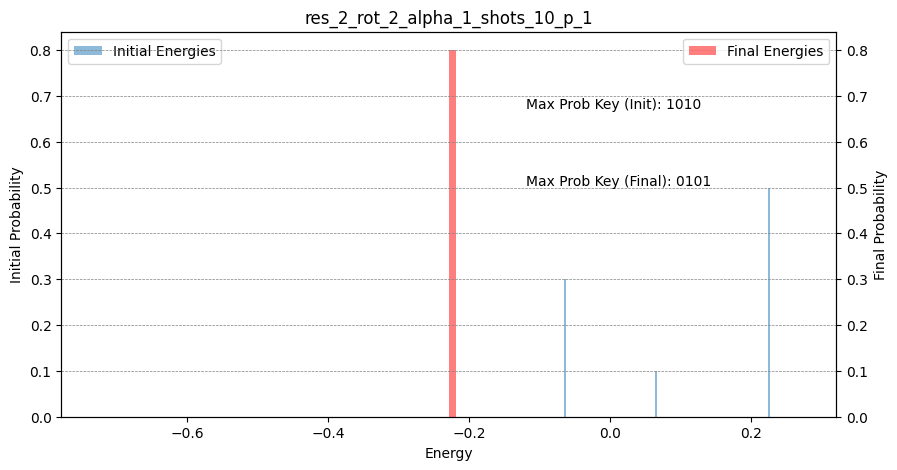

In [ ]:
from proteinfolding.data_plotter import DataPlotter

dp = DataPlotter(df_init_final)
dp.plot_init_and_final_probabilities(df_init_final, save_path=os.path.join(CWD, 'plots'), display=True)

In [71]:
# save df as csv

df.to_csv(os.path.join(CWD, "df.csv"), index=False)

In [72]:
# print df_exact where num_res = 2 and num_rot = 2

df_exact_slice = df_exact[(df_exact["num_res"] == 2) & (df_exact["num_rot"] == 2)]

# save as csv

df_exact_slice.to_csv(os.path.join(CWD, "df_exact_slice.csv"), index=False)

In [10]:
# test initial bitstring generation

from proteinfolding.supporting_functions import generate_initial_bitstring

print(generate_initial_bitstring(4,2,1))

0101
